In [1]:
import pandas as pd

# create dataframe from table
df = pd.read_csv('data.csv')


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# tokenize symptoms
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Symptoms'])
sequences = tokenizer.texts_to_sequences(df['Symptoms'])
padded_sequences = pad_sequences(sequences, maxlen=100, truncating='post')

# convert categories to numerical form
category_dict = {'Disease': 0, 'Description': 1, 'Severity': 2, 'Category': 3, 'Symptoms': 4, 'Remedies': 5}
df['Category'] = df['Category'].map(category_dict)

# split data into training and validation sets
X = padded_sequences
y = df['Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# define model architecture
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(units=64),
    Dense(units=6, activation='softmax')
])

# compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
model.fit(X_train, y_train, epochs=2, batch_size=20, validation_data=(X_val, y_val))


Epoch 1/2


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\ProgramData\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\ProgramData\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\ProgramData\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\nites\AppData\Local\Temp\ipykernel_8540\2059193227.py", line 15, in <module>
      model.fit(X_train, y_train, epochs=2, batch_size=20, validation_data=(X_val, y_val))
    File "C:\Users\nites\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\nites\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\nites\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\nites\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\nites\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\nites\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\nites\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\nites\AppData\Roaming\Python\Python310\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\nites\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\nites\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\nites\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\nites\AppData\Roaming\Python\Python310\site-packages\keras\backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of -9223372036854775808 which is outside the valid range of [0, 6).  Label values: -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_12551]

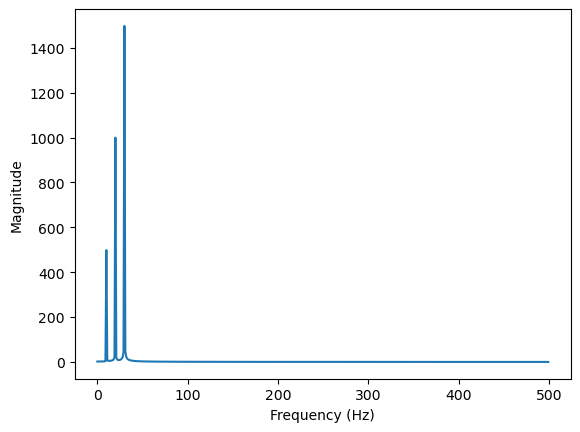

Mean squared error: 2.5162664443283815


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from scipy.fftpack import fft

# Generate multiple sine waves
t = np.linspace(0, 1, 1000)
frequencies = [10, 20, 30]
amplitudes = [1, 2, 3]
phases = [0, np.pi/2, np.pi]
sine_waves = [amplitudes[i] * np.sin(2*np.pi*frequencies[i]*t + phases[i]) for i in range(len(frequencies))]

# Combine the sine waves to create a composite signal
composite_signal = sum(sine_waves)

# Compute the FFT of the composite signal
fft_data = np.abs(fft(composite_signal))

# Compute the frequency axis
freqs = np.fft.fftfreq(len(composite_signal), 1/len(composite_signal))

# Plot the magnitude spectrum
plt.plot(freqs[:len(freqs)//2], fft_data[:len(fft_data)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

# Normalize the data
composite_signal_norm = (composite_signal - composite_signal.mean()) / composite_signal.std()
fft_data_norm = (fft_data - fft_data.mean()) / fft_data.std()

# Split the data into training and testing sets
X_train, X_test = composite_signal_norm[:800], composite_signal_norm[800:]
y_train, y_test = fft_data_norm[:800], fft_data_norm[800:]

# Train a neural network model
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
model.fit(X_train.reshape(-1, 1), y_train)

# Evaluate the model on the testing set
error = np.mean((model.predict(X_test.reshape(-1, 1)) - y_test)**2)
print("Mean squared error:", error)
